In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

# Read file dataset from CSV
data = pd.read_csv("Survei Pengguna Produk Simpanan Individu.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                        --------------  ----- 
 0   Timestamp                                                                                                                                                                                             

In [10]:
data.rename(columns = {
    "Timestamp":"jejak waktu",
    "Kami mohon kesediaan Anda untuk menjawab pertanyaan-pertanyaan pada section berikutnya dengan jujur dan sesuai dengan produk simpanan individu yang Anda miliki. Dengan lanjut ke section berikutnya, Anda menyetujui bahwa seluruh data (terkecuali nama dan nomor telepon undian) akan digunakan sebagai bahan penelitian.":"perizinan",
    "Produk simpanan individu apa yang Anda gunakan?":"PSI",
    "Nama / Inisial":"nama",
    "Nomor Telepon - GOPAY/OVO/SHOPEEPAY":"nomor_telepon",
    "Umur":"umur",
    "Domisili":"domisili",
    "Gender":"gender",
    "Status Perkawinan":"status_perkawinan",
    "Jumlah Tanggungan":"jumlah_tanggungan",
    "Kegiatan atau pekerjaan saat ini":"profesi",
    "Apa tujuan pengunaan produk simpanan individu yang Anda pilih?":"tujuan",
    "Berapa jumlah rata-rata penghasilan Anda per bulan?":"penghasilan",
    "Seberapa besar rata-rata persentase penghasilan yang Anda tabung?":"persentasi_tabungan",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki fungsionalitas yang baik?":"rate_fungsionalitas",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki biaya admin yang sesuai dengan fungsi yang Anda dapatkan?":"rate_admin",
    "Menurut Anda, apakah produk simpanan individu yang anda gunakan memiliki limit tabungan yang sesuai dengan kebutuhan Anda?":"rate_limit",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki bunga tabungan yang sesuai dengan keinginan Anda?":"rate_bunga",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki syarat setoran awal yang memberatkan?":"rate_setoran_awal",
    "Apakah produk simpanan individu yang Anda gunakan sudah sesuai dan cocok dengan kebutuhan, kemampuan, dan keinginan Anda?":"rate_kebutuhan",
    "Apakah ada alasan lain di luar bunga, limit, dan biaya admin yang membuat Anda memutuskan untuk menggunakan produk simpanan individu tersebut?":"alasan_lainnya"
    }, 
            inplace = True)

print(data)

             jejak waktu                        perizinan                 PSI  \
0       12/11/2024 16:35  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
1    13/11/2024 07:03:59  Setuju dan saya bersedia lanjut    Tabungan Regular   
2    13/11/2024 07:08:22  Setuju dan saya bersedia lanjut    Tabungan Regular   
3    13/11/2024 07:15:44  Setuju dan saya bersedia lanjut    Tabungan Regular   
4    13/11/2024 07:18:27  Setuju dan saya bersedia lanjut    Tabungan Regular   
..                   ...                              ...                 ...   
439      5/12/2024 10:54  Setuju dan saya bersedia lanjut    Tabungan Regular   
440      6/12/2024 18:11  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
441      7/12/2024 23:47  Setuju dan saya bersedia lanjut    Tabungan Regular   
442      9/12/2024 18:16  Setuju dan saya bersedia lanjut    Tabungan Regular   
443  15/12/2024 18:43:03  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   

                      nama 

Handle Missing Value

jejak waktu              0
perizinan                0
PSI                      0
nama                    79
nomor_telepon           89
umur                     0
domisili                 0
gender                   0
status_perkawinan        0
jumlah_tanggungan        0
profesi                  0
tujuan                   0
penghasilan              0
persentasi_tabungan      0
rate_fungsionalitas      0
rate_admin               0
rate_limit               0
rate_bunga               0
rate_setoran_awal        0
rate_kebutuhan           0
alasan_lainnya         193
dtype: int64

 ---Visualization---


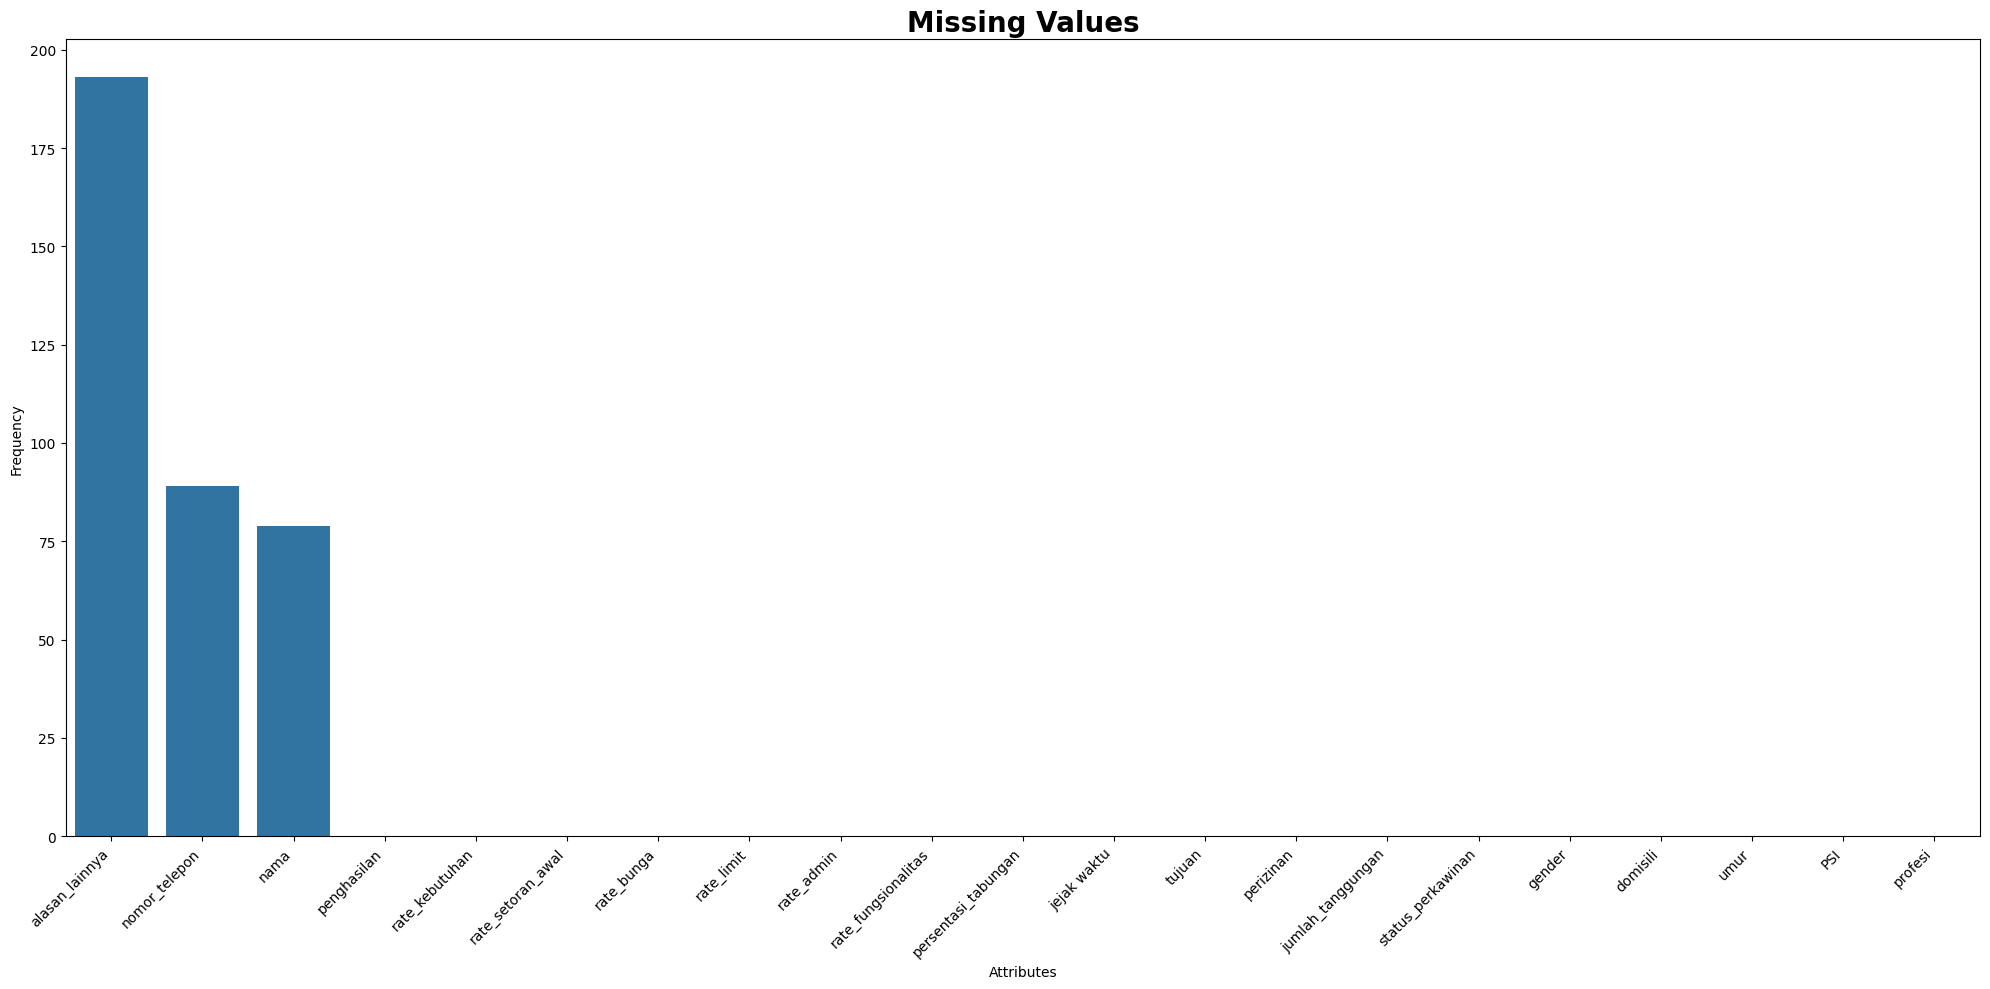

In [11]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()




In [12]:
# Hapus data by label
data.dropna(subset=['PSI'], inplace=True)


# Cek missing value
print(data.isnull().sum())

jejak waktu              0
perizinan                0
PSI                      0
nama                    79
nomor_telepon           89
umur                     0
domisili                 0
gender                   0
status_perkawinan        0
jumlah_tanggungan        0
profesi                  0
tujuan                   0
penghasilan              0
persentasi_tabungan      0
rate_fungsionalitas      0
rate_admin               0
rate_limit               0
rate_bunga               0
rate_setoran_awal        0
rate_kebutuhan           0
alasan_lainnya         193
dtype: int64


Remove Irrelevant Attributes

C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Cons

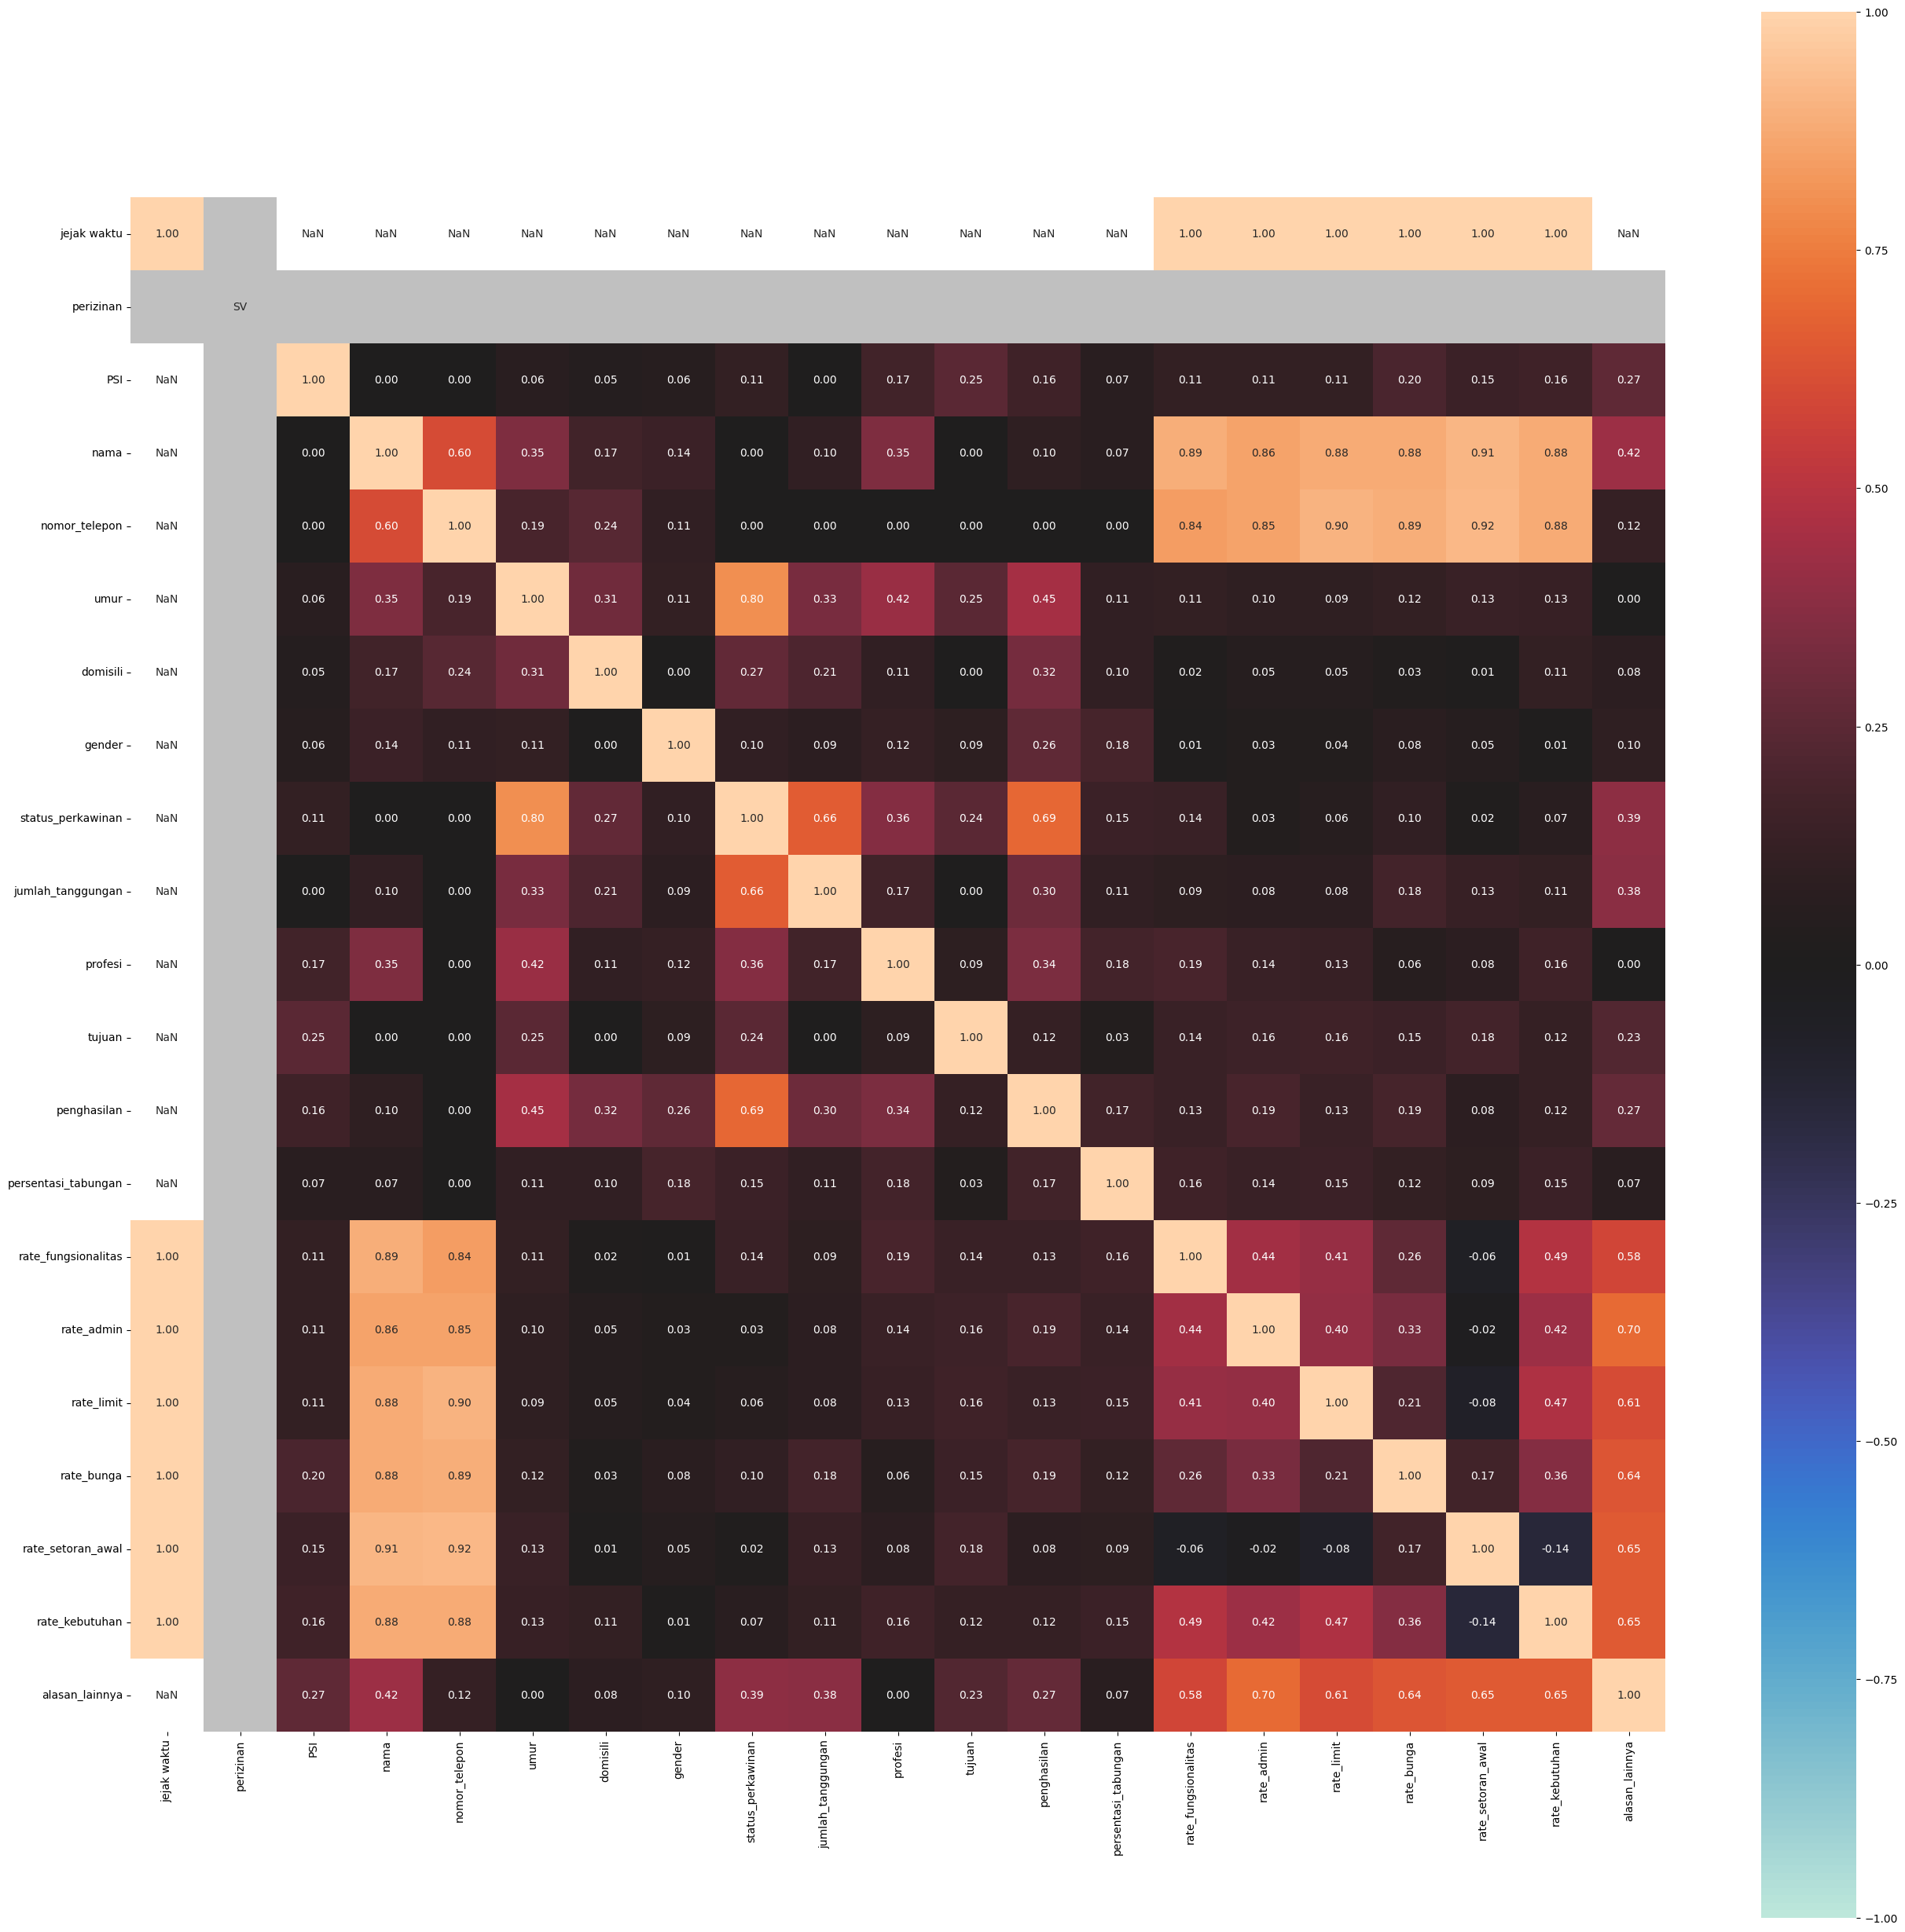

In [13]:
correlations = associations(data)
corr = correlations['corr']

In [15]:
# tampilin nilai corr mat by label
print(corr['PSI'])

jejak waktu            0.000000
perizinan              0.000000
PSI                    1.000000
nama                   0.000000
nomor_telepon          0.000000
umur                   0.063552
domisili               0.045980
gender                 0.060298
status_perkawinan      0.110882
jumlah_tanggungan      0.000000
profesi                0.170219
tujuan                 0.248651
penghasilan            0.158232
persentasi_tabungan    0.067812
rate_fungsionalitas    0.112885
rate_admin             0.110241
rate_limit             0.111841
rate_bunga             0.201152
rate_setoran_awal      0.148419
rate_kebutuhan         0.162613
alasan_lainnya         0.265433
Name: PSI, dtype: float64


In [17]:
irrelevant_attributes = corr['PSI'][corr['PSI'] < 0.05].keys()
print("Kolom yang akan dihapus:", irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.05
for item in irrelevant_attributes:
    # Hapus kolom dengan nama yang ada di variabel `item`
    data.drop([item], axis=1, inplace=True)

print(data.columns)

Kolom yang akan dihapus: Index(['jejak waktu', 'perizinan', 'nama', 'nomor_telepon', 'domisili',
       'jumlah_tanggungan'],
      dtype='object')
Index(['PSI', 'umur', 'gender', 'status_perkawinan', 'profesi', 'tujuan',
       'penghasilan', 'persentasi_tabungan', 'rate_fungsionalitas',
       'rate_admin', 'rate_limit', 'rate_bunga', 'rate_setoran_awal',
       'rate_kebutuhan', 'alasan_lainnya'],
      dtype='object')
